## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## Loading data

##### CSV file encoding check

In [2]:
with open('data/Housing.csv') as f:
    print(f)

<_io.TextIOWrapper name='data/Housing.csv' mode='r' encoding='cp1250'>


##### CSV file loading

In [3]:
df = pd.read_csv('data/Housing.csv', encoding='cp1250')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

## Data cleaning

##### 1.Duplicates.

In [5]:
num_duplicates = df.duplicated(keep='first').sum()
num_duplicates

0

##### SUMMARY: *There aren't any duplicates.*

##### 2.Handling NaN, None, Null.

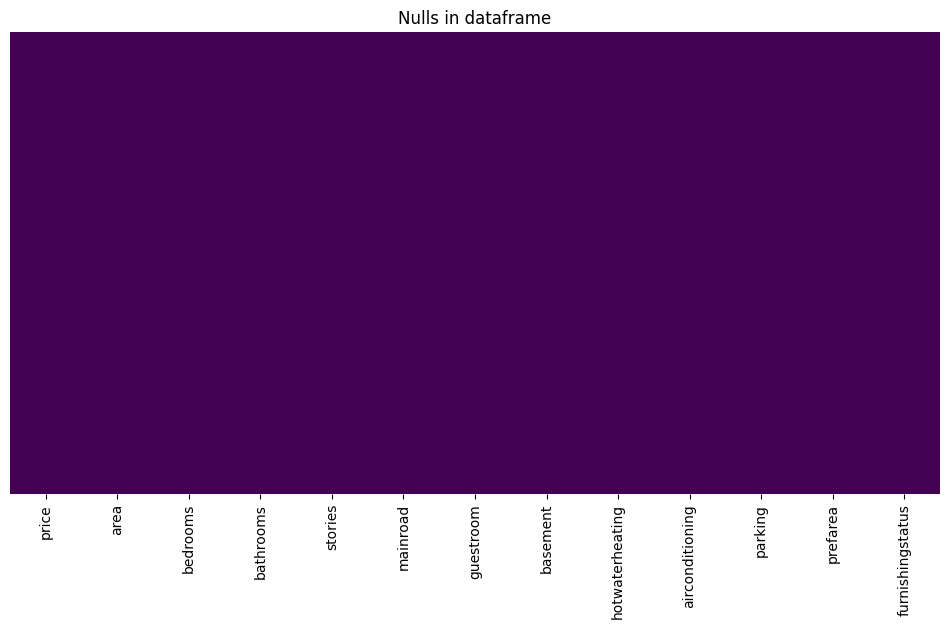

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Nulls in dataframe')
plt.savefig('../images/isnull.png', dpi=300, bbox_inches='tight')
plt.show()

##### SUMMARY: *There aren't any "Nulls".*

##### 3.Changing columns names.

In [7]:
df.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


In [8]:
df.rename(columns={'stories': 'floors', 'prefarea': 'prefneighbourhood'}, inplace=True)
df.head(1)

,price,area,bedrooms,bathrooms,floors,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefneighbourhood,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


##### 4.Checking if there are negative intigers/floats.

In [9]:
df.dtypes

price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
floors                int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefneighbourhood    object
furnishingstatus     object
dtype: object

In [10]:
columns = [0, 1, 2, 3, 4, 10]

for col in columns:
    negatives = (df.iloc[:,col]< 0).any()
    print(negatives)

False
False
False
False
False
False


In [11]:
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefneighbourhood']
for col in columns:
    df[col] = df[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0}).astype(int)

##### SUMMARY: *There aren't any negative values.*

##### 5. Saving model after cleaning.

In [12]:
df.to_csv('data/Housing_basic_cleaning.csv', index=False)

## EDA - Exploratory Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   price              545 non-null    int64 
 1   area               545 non-null    int64 
 2   bedrooms           545 non-null    int64 
 3   bathrooms          545 non-null    int64 
 4   floors             545 non-null    int64 
 5   mainroad           545 non-null    int32 
 6   guestroom          545 non-null    int32 
 7   basement           545 non-null    int32 
 8   hotwaterheating    545 non-null    int32 
 9   airconditioning    545 non-null    int32 
 10  parking            545 non-null    int64 
 11  prefneighbourhood  545 non-null    int32 
 12  furnishingstatus   545 non-null    object
dtypes: int32(6), int64(6), object(1)
memory usage: 42.7+ KB


In [14]:
df.describe().map(lambda x: f'{x:0.2f}')

,price,area,bedrooms,bathrooms,floors,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefneighbourhood
count,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.86,0.18,0.35,0.05,0.32,0.69,0.23
std,1870439.62,2170.14,0.74,0.50,0.87,0.35,0.38,0.48,0.21,0.47,0.86,0.42
min,1750000.00,1650.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00
max,13300000.00,16200.00,6.00,4.00,4.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00


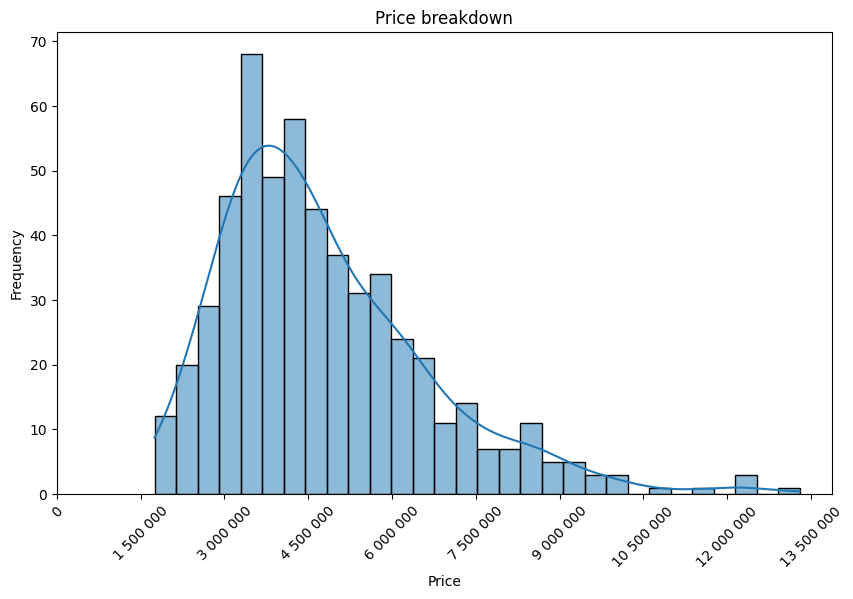

In [15]:
formatter = FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' '))
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(np.arange(0, 13500001, step=1500000), rotation=45)
plt.title("Price breakdown")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.savefig('../images/price_breakdown_hist.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE:*Clearly asymmetric right-skewed distribution — many observations in lower values ​​and a long tail towards expensive properties (outliers/super-luxuries).*

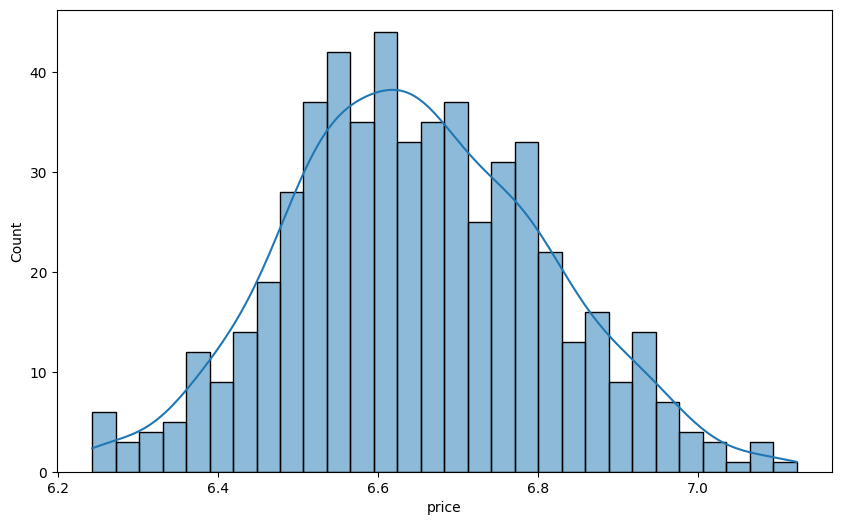

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(np.log10(df['price']), bins=30, kde=True)
plt.savefig('../images/log10_price_hist.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE:*The distribution is much more symmetric, close to normal — which is good for most ML models. I will apply a logarithmic transformation.*

<Figure size 1200x800 with 0 Axes>

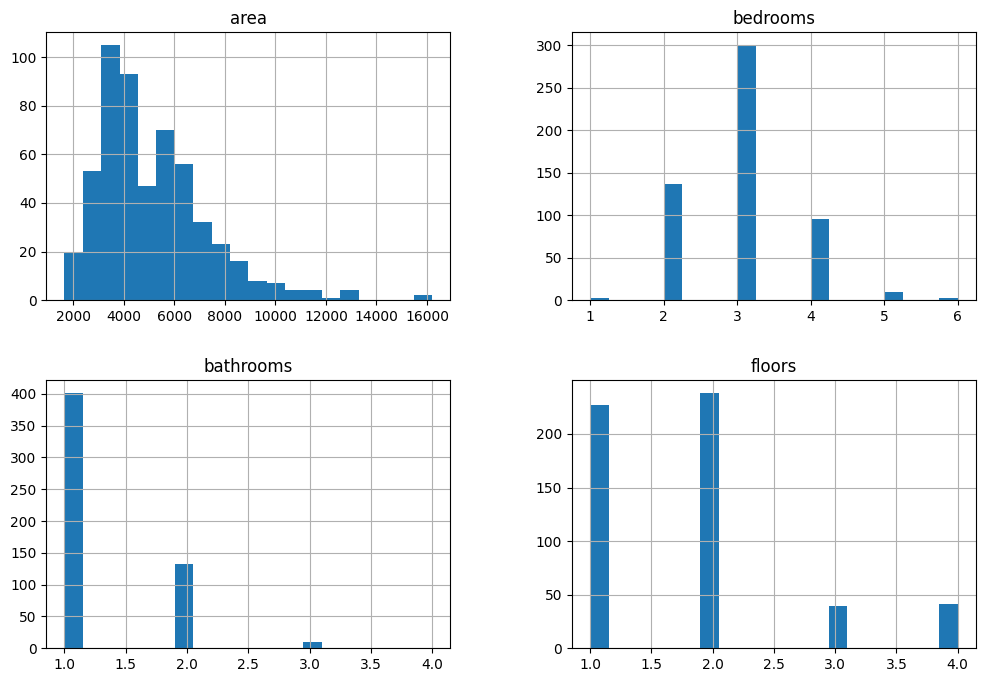

In [17]:
plt.figure(figsize=(12,8))
df[['area', 'bedrooms', 'bathrooms', 'floors']].hist(bins=20, figsize=(12,8))
plt.savefig('../images/histplots.png', dpi=300, bbox_inches='tight')
plt.show()

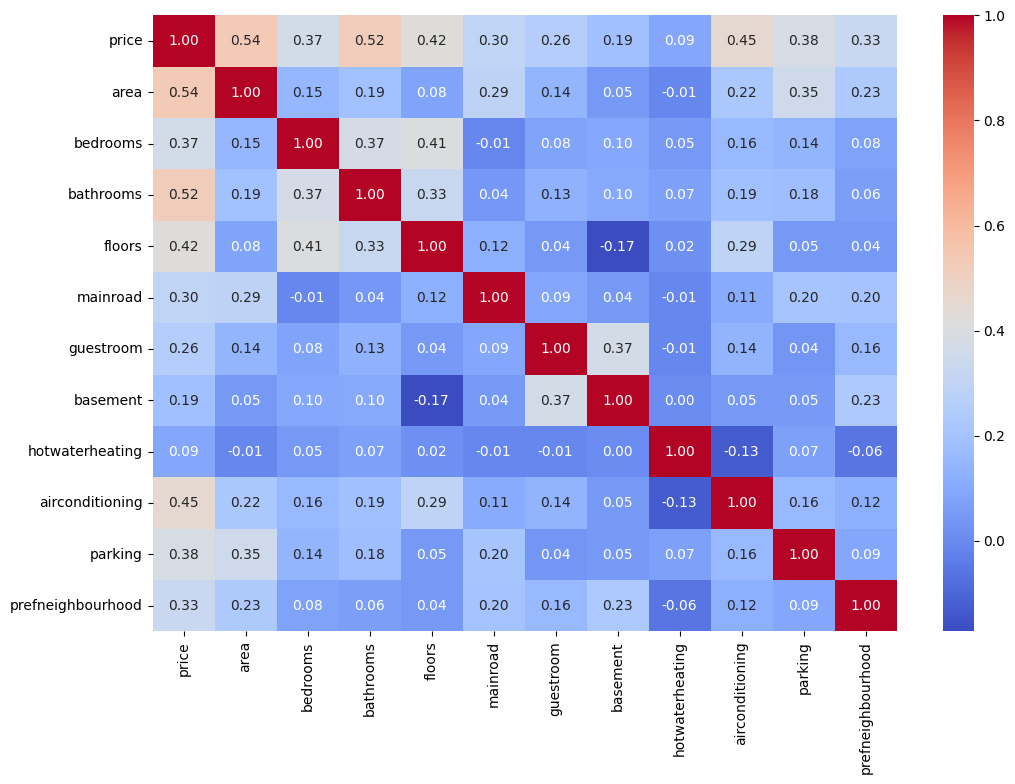

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.savefig('../images/corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

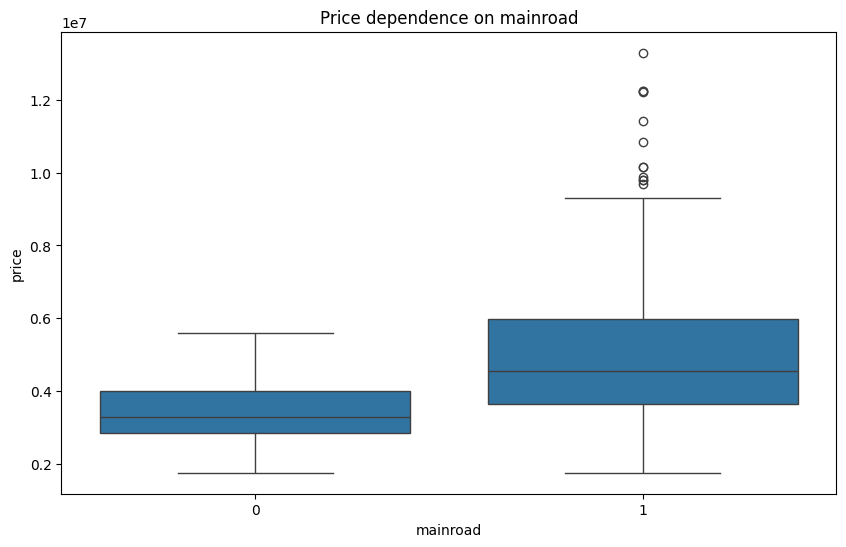

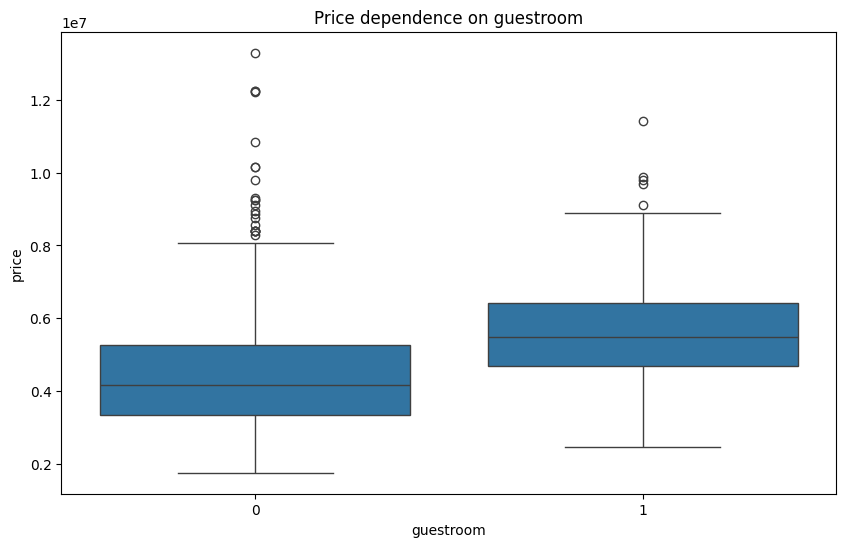

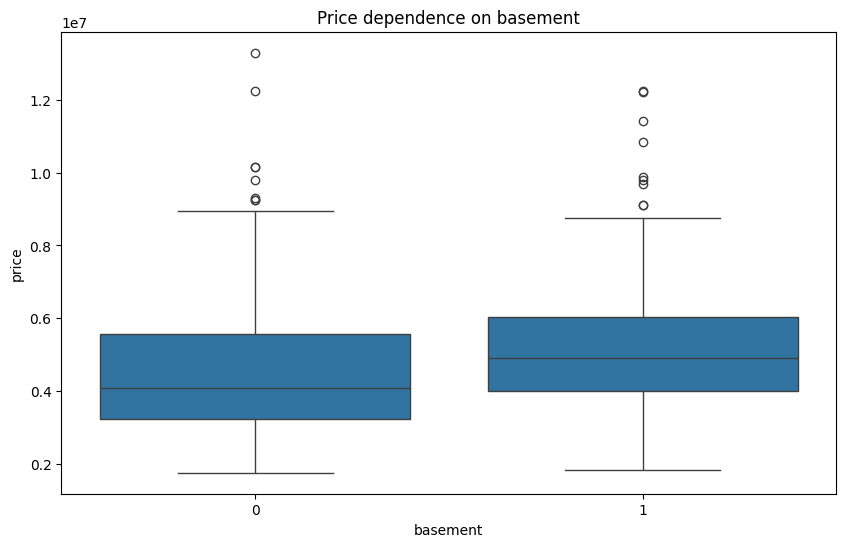

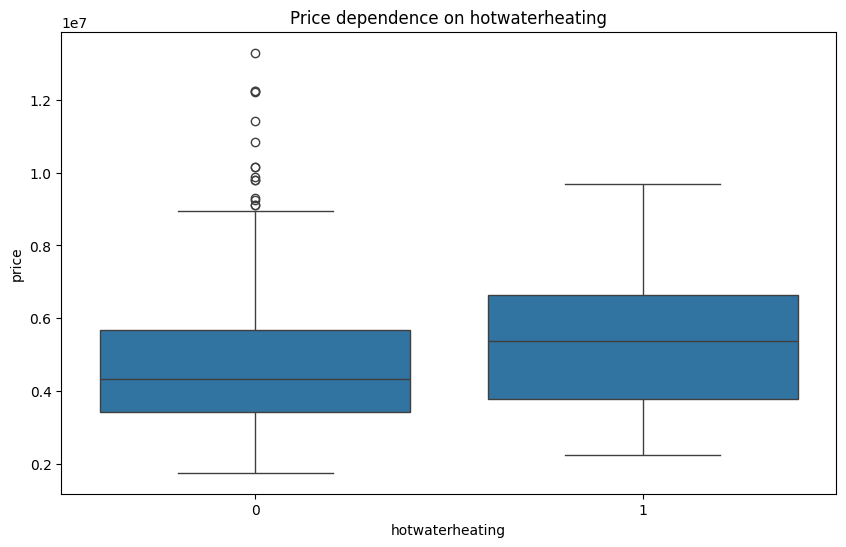

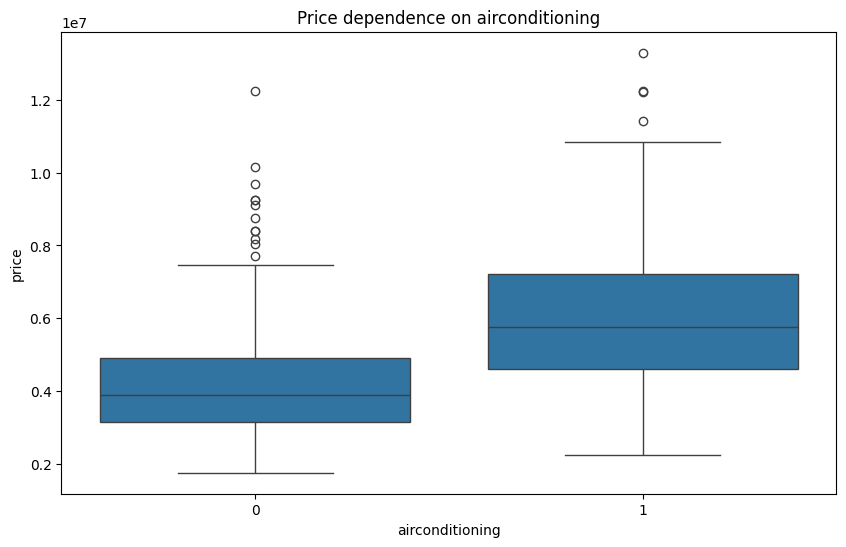

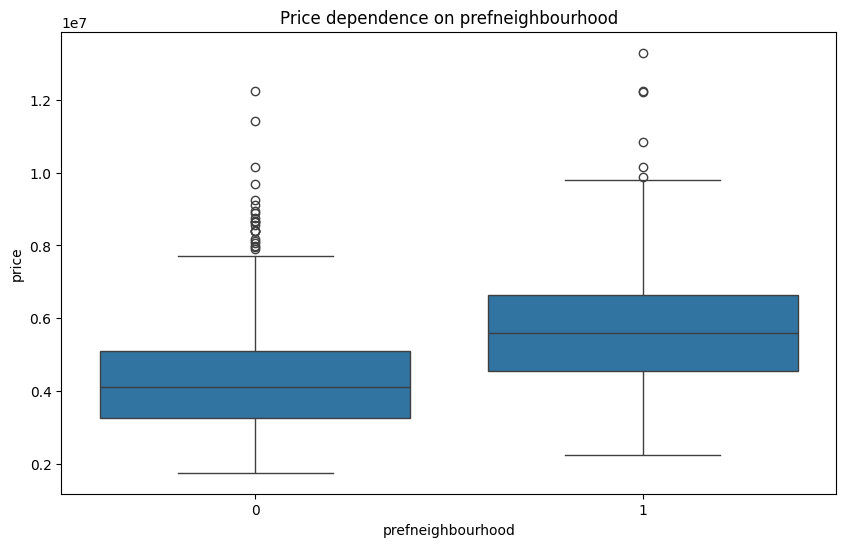

In [19]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefneighbourhood']
for col in binary_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f"Price dependence on {col}")
    plt.savefig(f'../images/{col}_box.png', dpi=300, bbox_inches='tight')
    plt.show()

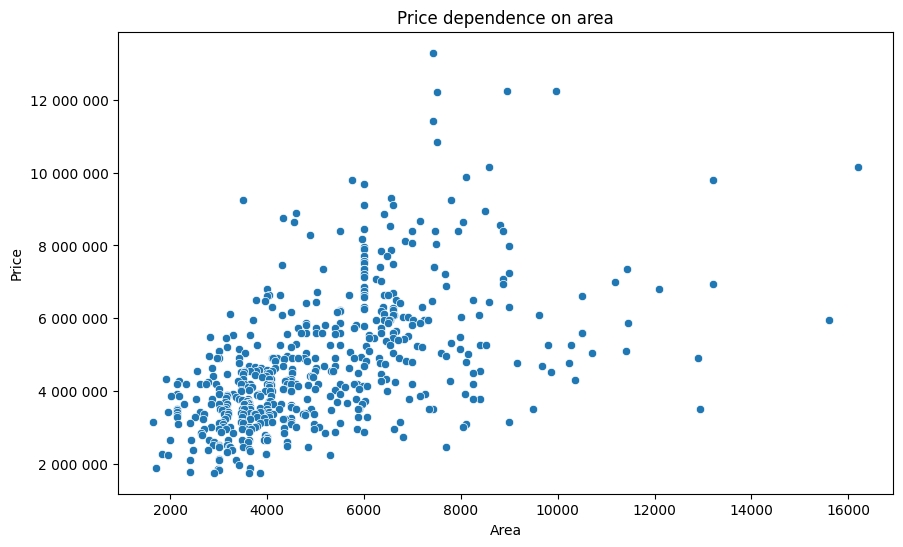

In [20]:
formatter = FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' '))
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title("Price dependence on area")
plt.xlabel("Area")
plt.ylabel("Price")
plt.savefig('../images/price_area_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x800 with 0 Axes>

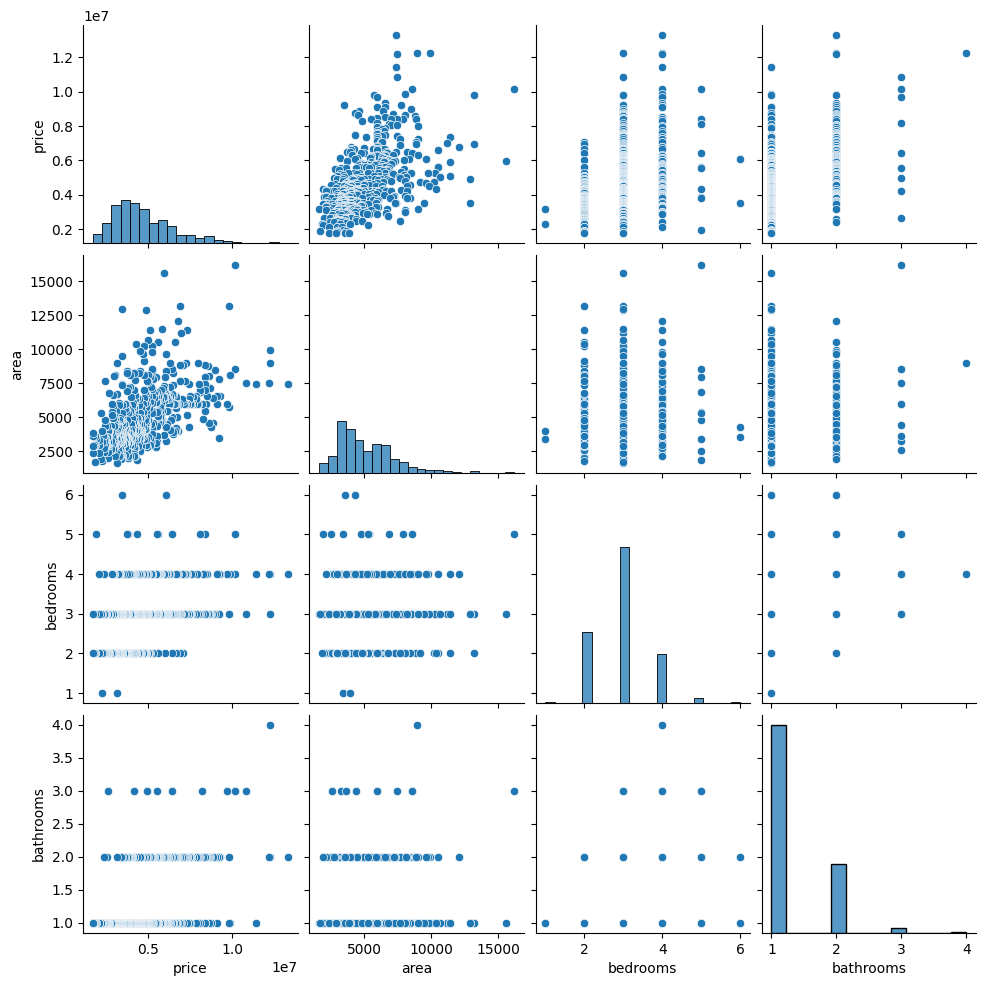

In [21]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms']])
plt.savefig('../images/pairplot.png', dpi=300, bbox_inches='tight')
plt.show()